In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display, HTML
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/LDA_ex_2.ipynb 

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

In [3]:
#Loading in the data
data = pd.read_csv('Concrete_Data.csv',sep=';')

#adjusting the names of the columns in the datatset
data.rename(columns={
    'Cement (component 1)(kg in a m^3 mixture)':'cement', 
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'blast_furnace_slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'fly_ash', 
    'Water  (component 4)(kg in a m^3 mixture)':'water', 
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarse_aggregate', 
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fine_aggregate', 
    'Age (day)':'age', 
    'Concrete compressive strength(MPa, megapascals) ':'compressive_strength'
}, inplace=True)

#looking at it
data.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


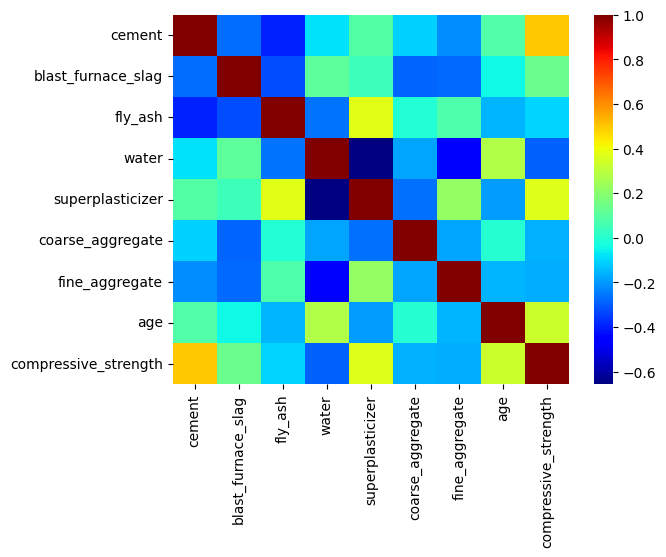

In [4]:
#Plotting a heatmap to show the correlation between the features
plt.figure
sns.heatmap(data.corr(),cmap = 'jet')
#plt.tight_layout()
plt.show()

In [5]:
Y = data.compressive_strength #dependant variable
X = data.loc[:,:"age"] #independant variables

X

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [6]:
scaler = StandardScaler().fit(X) #Initialize a StandardScaler instance and fit it to the dataset X
data_scaled = scaler.transform(X) # Apply the scaler to the data (standardize the features in X) 
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)#Convert the scaled data back into a dataframe of the same structure
data_scaled

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487
...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.564545,-0.092171,0.451410,-1.323005,-0.065893,-0.279733
1026,0.392819,-0.856888,0.960068,0.676200,0.702626,-1.994680,0.496893,-0.279733
1027,-1.270088,0.759579,0.850635,0.521589,-0.017528,-1.036064,0.080107,-0.279733
1028,-1.168610,1.308065,-0.847144,-0.279579,0.853356,0.214641,0.191166,-0.279733


# PCA

In [7]:
pca = PCA().fit(data_scaled) #PCA instance and fit it to the scaled data

# Create a dataframe of the eigenvectors
pca_eigen = pd.DataFrame(
    pca.components_.T,  #Transpose to get features as rows and components as columns
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"],  #Name principal components
    index=data_scaled.columns  #original feature names as the index
)

# Compute the loadings
pca_data = pd.DataFrame()
pca_data["PC"] = pca_eigen.columns 
pca_data["Explained Variance"] = pca.explained_variance_  # Explained variance for each PC
pca_data["Explained Variance Ratio"] = pca.explained_variance_ratio_  #ratio of explained variance for each PC
pca_data.set_index('PC')  #'PC' as the index of the DataFrame

# Compute the PCA scores
pca_scores = pd.DataFrame(
    pca.transform(data_scaled),  #Transform the scaled data to get scores
    columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"],  
    index=data_scaled.index  #Retain the original index for the data
)

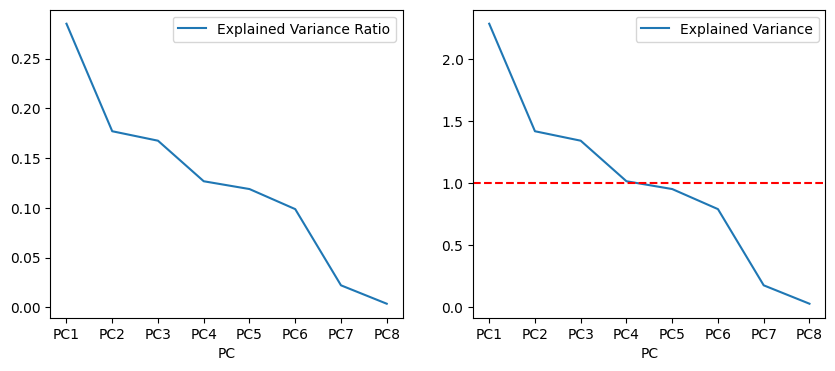

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
fig.subplots_adjust(hspace=0.8, wspace=0.2)
axs = axs.ravel()

pca_data.plot(x='PC',y='Explained Variance Ratio', ax=axs[0])
pca_data.plot(x='PC',y='Explained Variance', ax=axs[1])
plt.axhline(y=1, color='r', linestyle='--')

/tmp/ipykernel_11837/2767668448.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pca_eigen["PC1"][i],
/tmp/ipykernel_11837/2767668448.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pca_eigen["PC2"][i],


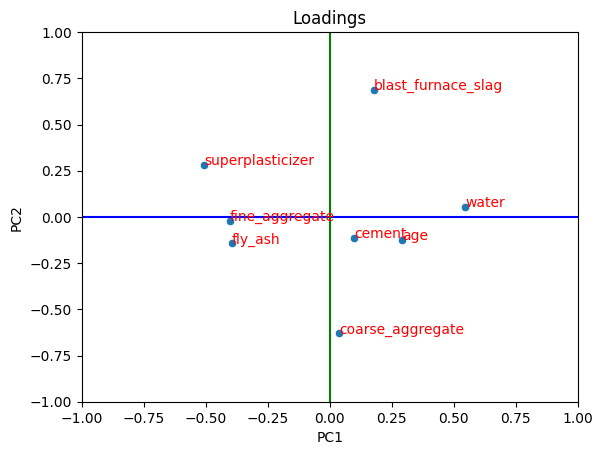

In [9]:
# Plot the loadings
sns.scatterplot(data=pca_eigen, x="PC1", y="PC2")
plt.title('Loadings')
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Plot annotations
for i in range(pca_eigen.shape[0]):
    plt.text(
        pca_eigen["PC1"][i],
        pca_eigen["PC2"][i],
        pca_eigen.index[i],
        color="red",
    )

plt.show() 

## LDA

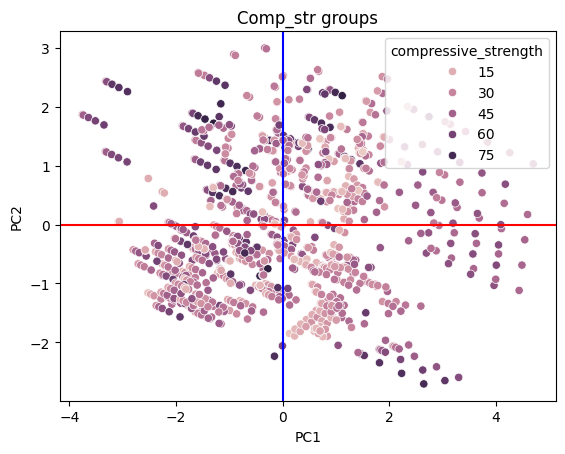

In [10]:
sns.scatterplot(data=pca_scores, x="PC1", y="PC2", hue=Y)
plt.title('Comp_str groups')
plt.axhline(0, color="red")
plt.axvline(0, color="blue")
plt.show()

In [11]:
values = Y.describe().T

compressive_str25 = 23.710
compressive_str50 = 34.445
compressive_str75 = 46.135

values

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: compressive_strength, dtype: float64

In [12]:
Y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: compressive_strength, Length: 1030, dtype: float64

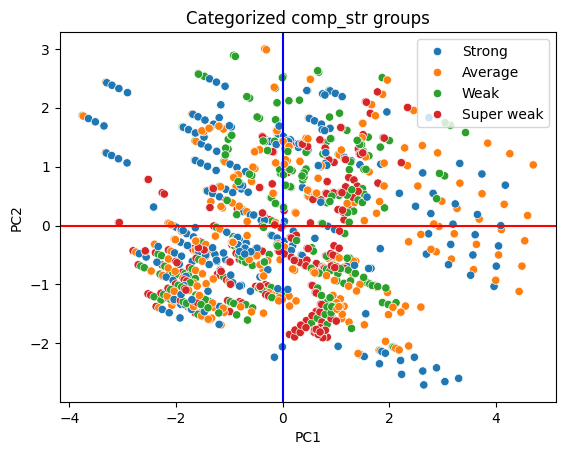

In [13]:
Y_labeled = []

for var in Y:  # Label the data according to compressive strength
    if var > compressive_str75:
        Y_labeled.append("Strong")
    elif compressive_str75 > var > compressive_str50:
        Y_labeled.append("Average")
    elif compressive_str50 > var > compressive_str25:
        Y_labeled.append("Weak")
    elif var < compressive_str25:
        Y_labeled.append("Super weak")

#plot it again in the same fashion
sns.scatterplot(data=pca_scores, x="PC1", y="PC2", hue=Y_labeled)
plt.title('Categorized comp_str groups')
plt.axhline(0, color="red")
plt.axvline(0, color="blue")
plt.show()

In [14]:
def pretty_scalings(lda, X, out=False):
    ret = pd.DataFrame(lda.scalings_, index=X.columns, columns=["LD"+str(i+1) for i in range(lda.scalings_.shape[1])])
    if out:
        print("Coefficients of linear discriminants:")
        display(ret)
    return ret

lda = LDA().fit(data_scaled, Y_labeled)

#loadings
pretty_scallings=pretty_scalings(lda, data_scaled, out=True)

Coefficients of linear discriminants:


,LD1,LD2,LD3
cement,-1.336852,-0.383428,0.862372
blast_furnace_slag,-0.912498,-0.392063,1.328092
fly_ash,-0.602518,0.242532,0.960215
water,0.339832,0.145958,0.838495
superplasticizer,-0.234886,-0.229416,0.131789
coarse_aggregate,-0.117848,-0.643173,0.136732
fine_aggregate,-0.107871,-0.492006,0.869155
age,-0.871901,0.485748,-0.373712


In [15]:
def rpredict(lda, X, y, out=False):
    ret = {"class": lda.predict(X),
           "posterior": pd.DataFrame(lda.predict_proba(X), columns=lda.classes_)}
    ret["x"] = pd.DataFrame(lda.fit_transform(X, y))
    ret["x"].columns = ["LD"+str(i+1) for i in range(ret["x"].shape[1])]
    if out:
        print("class")
        print(ret["class"])
        print()
        print("posterior")
        print(ret["posterior"])
        print()
        print("x")
        print(ret["x"])
    return ret

lda_values=rpredict(lda, data_scaled, Y_labeled, True)

class
['Strong' 'Strong' 'Strong' ... 'Weak' 'Super weak' 'Weak']

posterior
       Average    Strong  Super weak      Weak
0     0.194056  0.777465    0.003898  0.024582
1     0.180325  0.792947    0.003702  0.023026
2     0.408072  0.576435    0.000299  0.015193
3     0.195326  0.803020    0.000009  0.001645
4     0.244605  0.749055    0.000134  0.006206
...        ...       ...         ...       ...
1025  0.417875  0.201715    0.059393  0.321018
1026  0.369073  0.062133    0.115234  0.453560
1027  0.174187  0.012816    0.295981  0.517016
1028  0.162010  0.035155    0.422512  0.380323
1029  0.297789  0.047349    0.162801  0.492061

[1030 rows x 4 columns]

x
           LD1       LD2       LD3
0    -1.912558 -0.903010 -1.500835
1    -1.935304 -1.027149 -1.474445
2    -2.683232  3.017220 -0.993471
3    -3.995104  3.748082 -1.555763
4    -3.060662  2.195550 -1.608987
...        ...       ...       ...
1025 -0.455073  0.593450  0.999721
1026  0.168435  1.258255  1.045871
1027  1.031009  

In [16]:
#Function to calculate the in group variance
def calcWithinGroupsVariance(variable, groupvariable):
    # Find the unique levels (groups) in the group variable
    levels = sorted(set(groupvariable))
    numlevels = len(levels)  # Number of unique groups
    
    # Initialize counters for the numerator and denominator of the variance calculation
    numtotal = 0
    denomtotal = 0
    
    # Loop through each group (level) to calculate variance within the group
    for leveli in levels:
        # Select data points corresponding to the current group
        levelidata = variable[groupvariable == leveli]
        levelilength = len(levelidata)  # Number of data points in the group
        
        # Calculate the standard deviation for the current group
        sdi = np.std(levelidata)
        
        # Numerator part: Sum of squared deviations for the group
        numi = (levelilength) * sdi**2
        
        # Denominator part: Sum of the number of elements in the group
        denomi = levelilength
        
        # Accumulate the numerator and denominator for all groups
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    
    # Calculate the within-groups variance using the formula
    Vw = numtotal / (denomtotal - numlevels)  # Subtract numlevels to account for degrees of freedom
    
    return Vw


In [17]:
#Function to calculate between group variance
def calcBetweenGroupsVariance(variable, groupvariable):
    # Find the unique levels (groups) in the group variable
    levels = sorted(set(groupvariable))
    numlevels = len(levels)  # Number of unique groups
    
    # Calculate the overall grand mean (mean of all data points)
    grandmean = np.mean(variable)
    
    # Initialize counters for the numerator and denominator of the variance calculation
    numtotal = 0
    denomtotal = 0
    
    # Loop through each group (level) to calculate the variance between groups
    for leveli in levels:
        # Select data points corresponding to the current group
        levelidata = variable[groupvariable == leveli]
        levelilength = len(levelidata)  # Number of data points in the group
        
        # Calculate the mean for the current group
        meani = np.mean(levelidata)
        
        # Numerator part: Weighted sum of squared differences between group mean and grand mean
        numi = levelilength * ((meani - grandmean) ** 2)
        
        # Denominator part: Sum of the number of elements in the group (not directly used here)
        denomi = levelilength
        
        # Accumulate the numerator and denominator for all groups
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    
    # Calculate the between-groups variance using the formula
    Vb = numtotal / (numlevels - 1)  # Adjust denominator by degrees of freedom (numlevels - 1)
    
    return Vb

In [18]:
#Calculate separation between groups

def calcSeparations(variables, groupvariable):
    # Loop through each variable in the dataset
    for variablename in variables:
        # Extract the data for the current variable
        variablei = variables[variablename]
        
        # Calculate the within-groups variance for the current variable
        Vw = calcWithinGroupsVariance(variablei, groupvariable)
        
        # Calculate the between-groups variance for the current variable
        Vb = calcBetweenGroupsVariance(variablei, groupvariable)
        
        # Calculate the separation as the ratio of between-groups variance to within-groups variance
        sep = Vb / Vw
        
        # Print the results for the current variable
        print("variable", variablename, "Vw=", Vw, "Vb=", Vb, "separation=", sep)

In [19]:
calcSeparations(lda_values["x"], Y)

variable LD1 Vw= 0.5671225227817037 Vb= 2.54985077525318 separation= 4.496119749831672
variable LD2 Vw= 0.5995882894016784 Vb= 1.1420955169320013 separation= 1.9047995718390098
variable LD3 Vw= 0.4545754182636019 Vb= 1.1313290972660328 separation= 2.4887599544812846


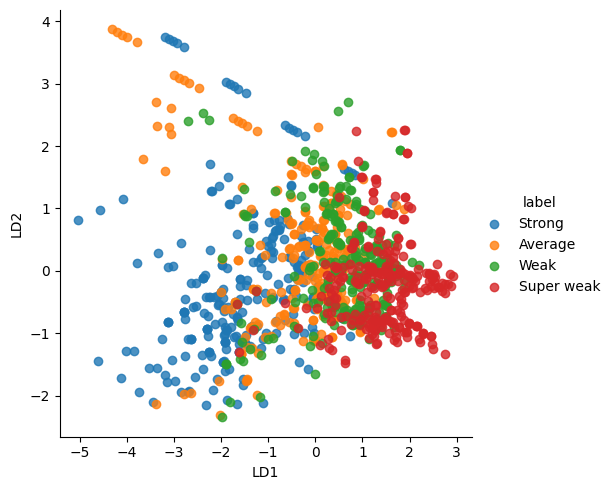

In [20]:
#Add labels as a column to use it as a hue in the graph
a=lda_values["x"].join(Y)
a['label']=Y_labeled
sns.lmplot(a,x="LD1", y="LD2", hue='label', fit_reg=False)

/tmp/ipykernel_11837/2320547259.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(a['LD1'], a['LD2'], a['LD3'], c=a['label'].map(cmapper), cmap='viridis')


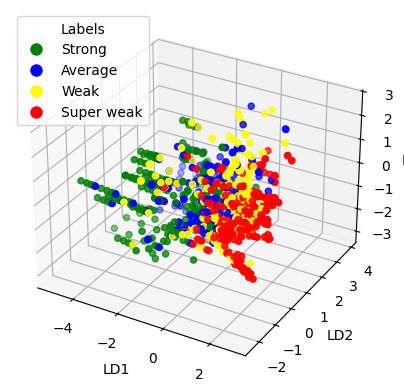

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Assuming Y is a list, convert it to a Series

# Create the data frame with LD1, LD2, and LD3, along with labels
a=lda_values["x"].join(Y)

# If Y_labeled is categorical, ensure it's mapped to numeric values
a['label'] = Y_labeled
cmapper = {'Strong':'Green', 'Average':'Blue', 'Weak':'Yellow', 'Super weak':'Red'}
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot, using c to represent the color by label
scatter = ax.scatter(a['LD1'], a['LD2'], a['LD3'], c=a['label'].map(cmapper), cmap='viridis')

# Add labels for the axes
ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
ax.set_zlabel('LD3')

# Add legend based on colors used in the scatter plot
legend_labels = list(cmapper.keys())
legend_colors = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmapper[label], markersize=10) for label in legend_labels]
ax.legend(legend_colors, legend_labels, title="Labels")


# Show the plot
plt.show()


In [22]:
def ldahist(data, g, sep=False):
    xmin = np.trunc(np.min(data)) - 1
    xmax = np.trunc(np.max(data)) + 1
    ncol = len(set(g))
    binwidth = 0.5
    bins=np.arange(xmin, xmax + binwidth, binwidth)
    if sep:
        fig, axl = plt.subplots(ncol, 1, sharey=True, sharex=True)
    else:
        fig, axl = plt.subplots(1, 1, sharey=True, sharex=True)
        axl = [axl]*ncol
    for ax, (group, gdata) in zip(axl, data.groupby(g)):
        sns.histplot(gdata.values, bins=10, ax=ax, label=str(group),stat="density", kde=True,kde_kws=dict(cut=1),alpha=.4, edgecolor=(1, 1, 1, .4))
        ax.set_xlim([xmin, xmax])
        if sep:
            ax.set_xlabel(str(group))
        else:
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

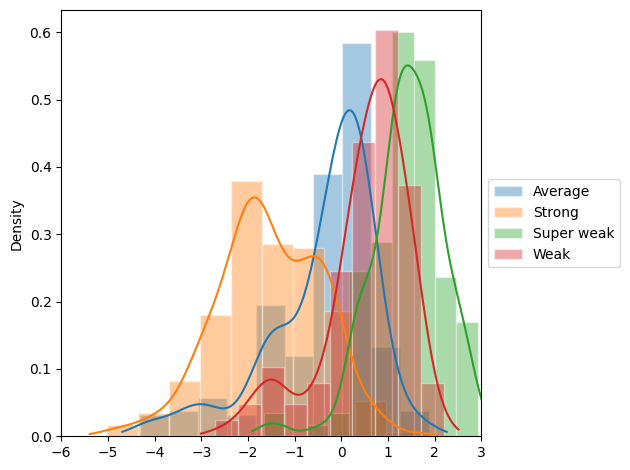

In [23]:
ldahist(lda_values["x"].LD1, Y_labeled)

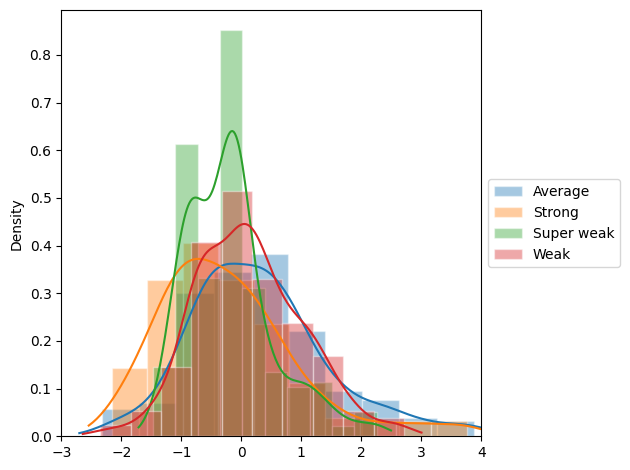

In [24]:
ldahist(lda_values["x"].LD2, Y_labeled)

In [25]:
Y_labeled = []

for var in Y:
    if var > compressive_str50:
        Y_labeled.append(("Strong"))
    else:
        Y_labeled.append(("Weak"))

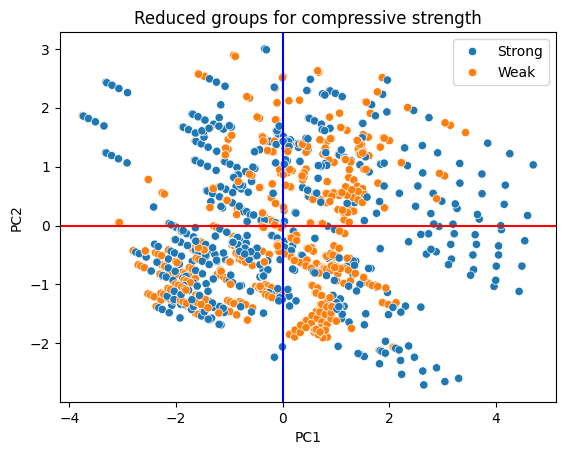

In [26]:
sns.scatterplot(data=pca_scores, x="PC1", y="PC2", hue=Y_labeled)
plt.title('Reduced groups for compressive strength')
plt.axhline(0, color="red")
plt.axvline(0, color="blue")
plt.show()

In [27]:
lda = LDA().fit(data_scaled, Y_labeled)
lda_values=rpredict(lda, data_scaled, Y_labeled, True)

class
['Strong' 'Strong' 'Strong' ... 'Weak' 'Weak' 'Weak']

posterior
        Strong      Weak
0     0.956128  0.043872
1     0.956724  0.043276
2     0.990984  0.009016
3     0.999006  0.000994
4     0.994918  0.005082
...        ...       ...
1025  0.648229  0.351771
1026  0.432883  0.567117
1027  0.159291  0.840709
1028  0.208238  0.791762
1029  0.338248  0.661752

[1030 rows x 2 columns]

x
           LD1
0    -1.778208
1    -1.786456
2    -2.711879
3    -3.988709
4    -3.044968
...        ...
1025 -0.352723
1026  0.155857
1027  0.959908
1028  0.770677
1029  0.387255

[1030 rows x 1 columns]


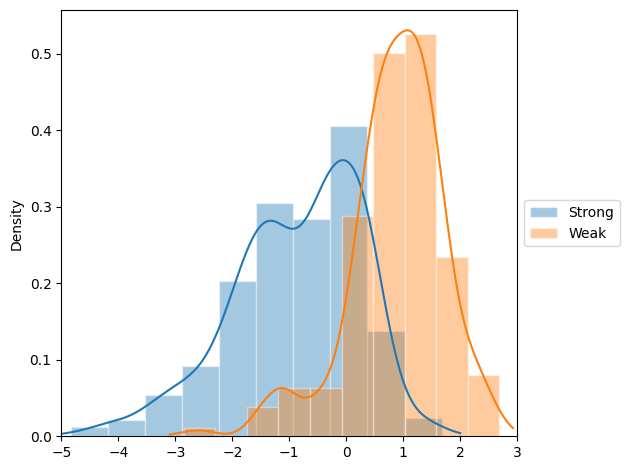

In [28]:
ldahist(lda_values["x"].LD1, Y_labeled)